Simple conway game of life rules on GPU

In [11]:
import torch
import numpy as np
import os

import matplotlib.pyplot as plt

os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "caching_allocator"

In [20]:
torch.cuda.is_available()
cuda = torch.device('cuda')
cpu = torch.device('cpu')


In [32]:
canvas = torch.randint(0, 2, (100, 100), device=cuda, dtype=torch.int)

In [33]:
canvas.to(cpu)

tensor([[1, 1, 1,  ..., 0, 0, 1],
        [1, 1, 0,  ..., 0, 1, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 1, 1],
        [1, 0, 0,  ..., 1, 0, 1],
        [0, 0, 1,  ..., 0, 1, 1]], dtype=torch.int32)

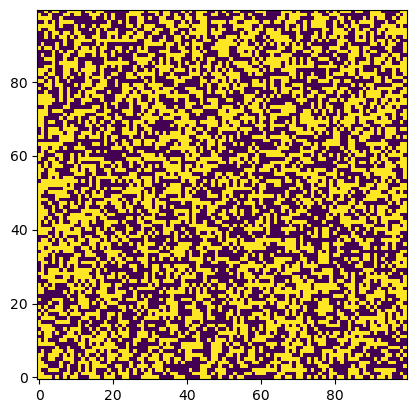

In [35]:
plt.imshow(canvas.to(cpu), origin="lower")

In [41]:
torch.roll(canvas, -1, dims=0)

tensor([[1, 1, 0,  ..., 0, 1, 0],
        [1, 0, 0,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 1],
        ...,
        [1, 0, 0,  ..., 1, 0, 1],
        [0, 0, 1,  ..., 0, 1, 1],
        [1, 1, 1,  ..., 0, 0, 1]], device='cuda:0', dtype=torch.int32)

In [47]:
canvas.device

device(type='cuda', index=0)

In [92]:
def calc_shifted(intensor):
    """shifted up, down, left, right"""

    out_size = (*tuple(intensor.shape), 4)
    output = torch.zeros(out_size, dtype=intensor.dtype, device=intensor.device)   
    output[:, :, 0] = torch.roll(canvas, shifts=-1, dims=0)
    output[:, :, 1] = torch.roll(canvas, shifts=1, dims=0)
    output[:, :, 2] = torch.roll(canvas, shifts=-1, dims=1)
    output[:, :, 3] = torch.roll(canvas, shifts=1, dims=1)
    return output
    
def calc_unshifted(intensor):
    out_size = (*tuple(intensor.shape), 4)
    output = torch.zeros(out_size, dtype=intensor.dtype, device=intensor.device)   
    output[:, :, 0] = torch.roll(canvas, shifts=1, dims=0)
    output[:, :, 1] = torch.roll(canvas, shifts=-1, dims=0)
    output[:, :, 2] = torch.roll(canvas, shifts=1, dims=1)
    output[:, :, 3] = torch.roll(canvas, shifts=-1, dims=1)
    return output

def center_cut(intensor):
    output = intensor[1:-1, 1:-1]
    
    
def null_edges(intensor):
    intensor[0, :] = 0
    intensor[:, 0] = 0
    intensor[:, -1] = 0
    intensor[-1, :] = 0
    return intensor


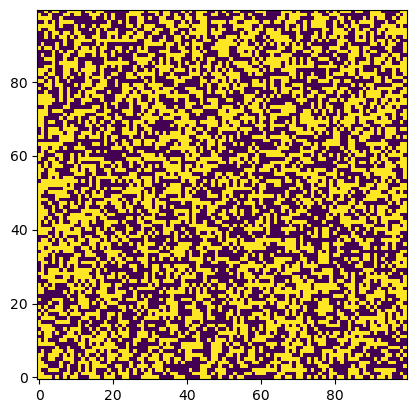

In [ ]:
, 